A. Изучить эволюционные алгоритмы оптимизации.

1 Генетический алгоритм
(https://pypi.org/project/geneticalgorithm/).

2 Алгоритм роя частиц
(https://pypi.org/project/pyswarm/).

3 Алгоритм муравья
(https://pypi.org/project/PyACO/).

4 Пчелиный алгоритм
(https://pypi.org/project/bees-algorithm/).

5 Алгоритм дифференциальной эволюции (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html).

B. Решить задачу оптимизации многоэкстремальной функции, используя
классический алгоритм оптимизации (например, алгоритм Ньютона) и
эволюционный алгоритм.
1. Выполнить для каждого из 2 алгоритмов по 100 прогонов,
вычислить математическое ожидание и дисперсию для финального
значения функции соответствия (целевой функции) алгоритма
оптимизации. Для эволюционных алгоритмов подобрать такие
значения параметров, при которых значение дисперсии
минимально.
2. Оценить время, требуемое для получения априори известного
значения глобального экстремума оптимизируемой функции при
условии, что завершение работы эволюционного алгоритма
осуществляется при достижении значения глобального экстремума.
3. Для эволюционных алгоритмов оценить время нахождения
последнего (возможно, локального) экстремума функции
соответствия (целевой функции) при условии, что завершение
работы алгоритма осуществляется при достижении максимального
числа поколений. Вычислить математическое ожидание и
дисперсию для времени нахождения последнего локального
экстремума функции соответствия (целевой функции). Вычислить
математическое ожидание и дисперсию для последнего локального
экстремума функции соответствия (целевой функции).
4. Выполнить визуализацию:
 для оптимизируемой функции (в трехмерном пространстве);
 для значений функции соответствия (целевой функции) в
зависимости от числа поколений в случае использования
эволюционного алгоритма.
5. Представить в табличном виде результаты расчетов для
математического ожидания и дисперсии по значению функции
соответствия (целевой функции) и по времени.

C. Реализовать поиск оптимальных значений параметров для SVM, knn,
RF-классификаторов с применением эволюционного алгоритма
оптимизации.

In [ ]:
%pip install geneticalgorithm

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np
from scipy.optimize import differential_evolution
from scipy import optimize
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def sphere_func(x):
    return np.sum(x**2, axis=0)

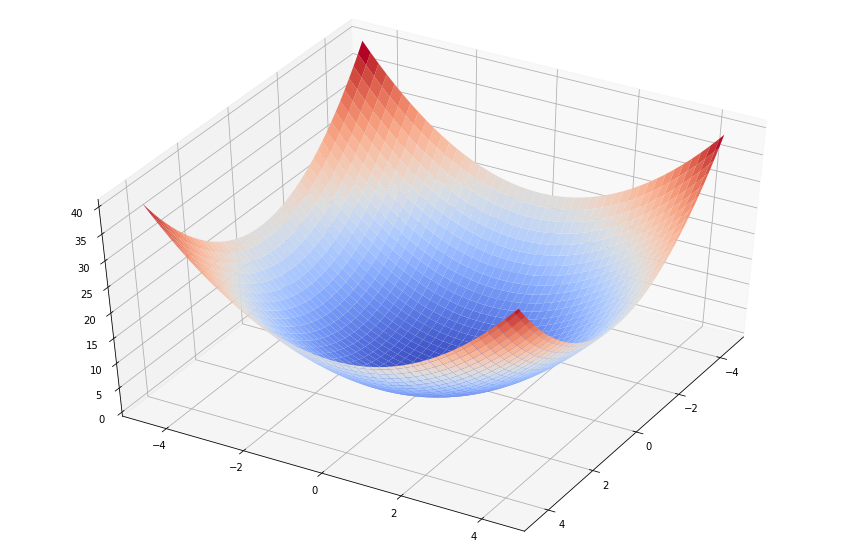

In [ ]:
# Настраиваем 3D график
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X = np.arange(-4.5, 4.5, 0.1)
Y = np.arange(-4.5, 4.5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = sphere_func(np.array([X,Y]))


# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [ ]:
def calculate_mean(values):
    return np.mean(np.array([values,[0,0]]), axis=0)

def calculate_var(values):
    return np.var(np.array([values, [0,0]]), axis=0)

In [ ]:
root = optimize.newton(func=sphere_func, x0=np.array([2,2]), maxiter=100)
print(f'root is: {root}')
print(f'mean is: {calculate_mean(root)}')
print(f'var is: {calculate_var(root)}')

root is: [1.95439407e-08 1.95439407e-08]
mean is: [9.77197037e-09 9.77197037e-09]
var is: [9.54914049e-17 9.54914049e-17]


 The best solution found:
 [1.40876657e-07 1.89569539e-08]

 Objective function:
 2.0205598633830082e-14


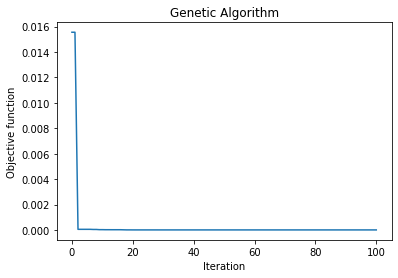

Report: {'variable': array([1.40876657e-07, 1.89569539e-08]), 'function': 2.0205598633830082e-14}
[7.04383286e-08 9.47847697e-09]
[4.96155813e-15 8.98415256e-17]


In [ ]:
varbound=np.array([[-4.5,4.5]]*2)
#Изменения: максимальное количество итераций - 100, размер популяции - 1000 (увеличение в 10 раз), вероятность мутации - 0.2 (увеличение в 2 раза)
algorithm_param = {'max_num_iteration': 100,\
                   'population_size':1000,\
                   'mutation_probability':0.2,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=sphere_func,\
            dimension=2,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()
variable_100 = model.output_dict.get('variable')
print(f'Report: {model.output_dict}')
print(calculate_mean(model.output_dict.get('variable')))
print(calculate_var(model.output_dict.get('variable')))

 The best solution found:
 [-1.71984081e-08  1.10252367e-14]

 Objective function:
 2.9578524277560437e-16


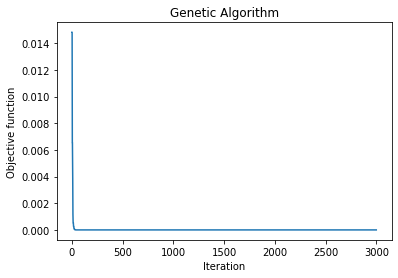

Report: {'variable': array([-1.71984081e-08,  1.10252367e-14]), 'function': 2.9578524277560437e-16}
[-8.59920407e-09  5.51261833e-15]
[7.39463107e-17 3.03889608e-29]
Time spent: 525.6145052909851


In [ ]:
start_time = time.time()
varbound=np.array([[-4.5,4.5]]*2)

algorithm_param = {'max_num_iteration': 3000,\
                   'population_size':1000,\
                   'mutation_probability':0.2,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=sphere_func,dimension=2,variable_type='real',variable_boundaries=varbound)

model=ga(function=sphere_func,\
            dimension=2,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()
end_time = time.time()
print(f'Report: {model.output_dict}')
print(calculate_mean(model.output_dict.get('variable')))
print(calculate_var(model.output_dict.get('variable')))

variable_3000 = model.output_dict.get('variable')
print(f'Time spent: {end_time - start_time}')

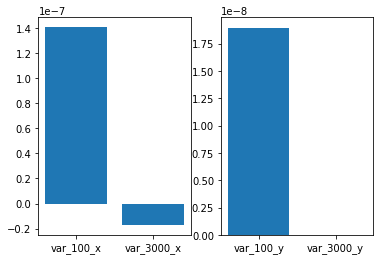

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].bar(['var_100_x', 'var_3000_x'], [variable_100[0], variable_3000[0]], label=['100', '3000'])
axs[1].bar(['var_100_y', 'var_3000_y'], [variable_100[1], variable_3000[1]], label=['100', '3000'])
plt.show()

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', sep=',', names=['age','year_of_operation', 'positive_axillary_nodes_detected', 'survive'])
df

,age,year_of_operation,positive_axillary_nodes_detected,survive
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = X.to_numpy()
y = y.to_numpy()
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
def find_params(model_name, X):
    if model_name == 'svc':
        model = SVC(C=int(X[0]), kernel=['linear', 'sigmoid','rbf', 'poly'][int(X[1])])
    elif model_name == 'knn':
        model = KNeighborsClassifier(n_neighbors=int(X[0]), metric=['euclidean', 'manhattan'][int(X[1])])
    elif model_name == 'rf':
        model = RandomForestClassifier(n_estimators=int(X[0]), max_depth=int(X[1]))
    model.fit(X_train, y_train)
    return -accuracy_score(y_test, model.predict(X_test))

def find_params_svc(X):
    model = SVC(C=int(X[0]), kernel=['linear', 'sigmoid','rbf', 'poly'][int(X[1])])
    model.fit(X_train, y_train)
    return -accuracy_score(y_test, model.predict(X_test))

def find_params_knn(X):
    model = KNeighborsClassifier(n_neighbors=int(X[0]), metric=['euclidean', 'manhattan'][int(X[1])])
    model.fit(X_train, y_train)
    return -accuracy_score(y_test, model.predict(X_test))

def find_params_rf(X):
    model = RandomForestClassifier(n_estimators=int(X[0]), max_depth=int(X[1]))
    model.fit(X_train, y_train)
    return -accuracy_score(y_test, model.predict(X_test))

    

 The best solution found:
 [10.  1.]

 Objective function:
 -0.6935483870967742


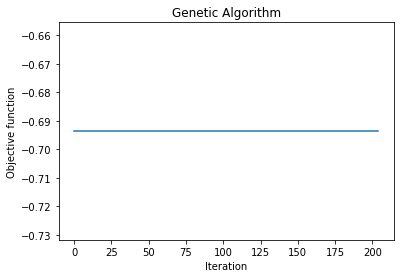

In [ ]:
varbound=np.array([[1,100],[0,3]])
algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
model=ga(function=find_params_svc,\
            dimension=2,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)
model.run()

 The best solution found:
 [3. 1.]

 Objective function:
 -0.6774193548387096


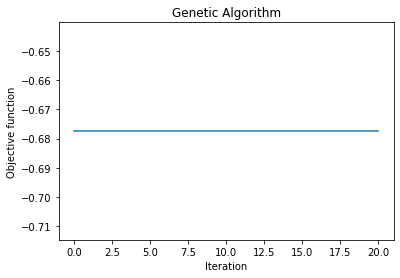

In [ ]:
varbound=np.array([[1,10],[0,1]])
algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
model=ga(function=find_params_knn,\
            dimension=2,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)
model.run()

 The best solution found:
 [135.  10.]

 Objective function:
 -0.7096774193548387


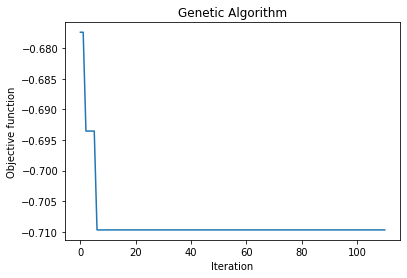

In [ ]:
varbound=np.array([[100,150],[10,15]])
algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
model=ga(function=find_params_rf,\
            dimension=2,\
            variable_type='int',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)
model.run()